In [86]:
import pandas as pd
import numpy as np
import math
import os
import string
from scipy.stats import norm
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
matplotlib.style.use("ggplot")
%matplotlib inline
from sklearn.linear_model import *
from subprocess import check_output

In [87]:
df=sns.load_dataset('tips')
print('rows, cols in tips: '+ str(df.shape))
print(df.describe().T)
print(df.head())
print(df.info())

rows, cols in tips: (244, 7)
            count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81
tip         244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625  10.00
size        244.0   2.569672  0.951100  1.00   2.0000   2.000   3.0000   6.00
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244

In [88]:
df['smoker'].value_counts()/df.shape[0]

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

In [89]:
df[::-1]  #reverses the data frame
df[:-1]  #drops last 1 obs
df[5:-5]  #drops last 5 obs and first 5
df[-5:]  #prints last 5 obs 

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [90]:
df[(df.sex=='Male') & (df.smoker=='No')][['sex','smoker','day']]
df[~((df.sex=='Male') & (df.smoker=='No'))][['sex','smoker','day']]  #removes a set of observation

,sex,smoker,day
0,Female,No,Sun
4,Female,No,Sun
11,Female,No,Sun
14,Female,No,Sun
16,Female,No,Sun
18,Female,No,Sun
21,Female,No,Sat
22,Female,No,Sat
29,Female,No,Sat
32,Female,No,Sat


In [91]:
sep= lambda x: np.std(x)


def class1(x,y):
    if x/y > 0.2:
        return 'More than 20%'
    elif x/y <=0.2 and x/y >0.15:
        return '15% to 20%'
    elif x/y <=0.15 and x/y >0.1:
        return '10% to 15%'
    elif x/y <=0.1 and x/y >0.05:
        return '5% to 10%'
    elif x/y <=0.05:
        return 'less than 5%'
    

df['sex1']=['M' if x=='Male' else 'F' for x in df['sex']]
df['class1']=[class1(x,y) for x, y  in zip(df['tip'],df['total_bill'])]
df['perc']=df.tip/df.total_bill

print(df)

     total_bill   tip     sex smoker   day    time  size sex1         class1  \
0         16.99  1.01  Female     No   Sun  Dinner     2    F      5% to 10%   
1         10.34  1.66    Male     No   Sun  Dinner     3    M     15% to 20%   
2         21.01  3.50    Male     No   Sun  Dinner     3    M     15% to 20%   
3         23.68  3.31    Male     No   Sun  Dinner     2    M     10% to 15%   
4         24.59  3.61  Female     No   Sun  Dinner     4    F     10% to 15%   
5         25.29  4.71    Male     No   Sun  Dinner     4    M     15% to 20%   
6          8.77  2.00    Male     No   Sun  Dinner     2    M  More than 20%   
7         26.88  3.12    Male     No   Sun  Dinner     4    M     10% to 15%   
8         15.04  1.96    Male     No   Sun  Dinner     2    M     10% to 15%   
9         14.78  3.23    Male     No   Sun  Dinner     2    M  More than 20%   
10        10.27  1.71    Male     No   Sun  Dinner     2    M     15% to 20%   
11        35.26  5.00  Female     No   S

In [92]:
t1=df.groupby(['sex'])['sex'].size().to_frame(name = 'count').reset_index()

t2=df.groupby(['sex','time'])['total_bill'].mean().to_frame(name = 'Mean').reset_index()

print(t1)
print(t2)

      sex  count
0    Male    157
1  Female     87
      sex    time       Mean
0    Male   Lunch  18.048485
1    Male  Dinner  21.461452
2  Female   Lunch  16.339143
3  Female  Dinner  19.213077


In [93]:
t3=df.groupby(['sex']).agg(['count','mean','sum','std','nunique'])['total_bill'].reset_index()
print(t3)

      sex  count       mean      sum       std  nunique
0    Male    157  20.744076  3256.82  9.246469      151
1  Female     87  18.056897  1570.95  8.009209       84


In [94]:
t4=t3.rename(columns={'count':'tb_count',
                     'mean':'tb_mean',
                     'sum':'tb_sum'})
print(t4)

      sex  tb_count    tb_mean   tb_sum       std  nunique
0    Male       157  20.744076  3256.82  9.246469      151
1  Female        87  18.056897  1570.95  8.009209       84


In [95]:
#visualization's

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

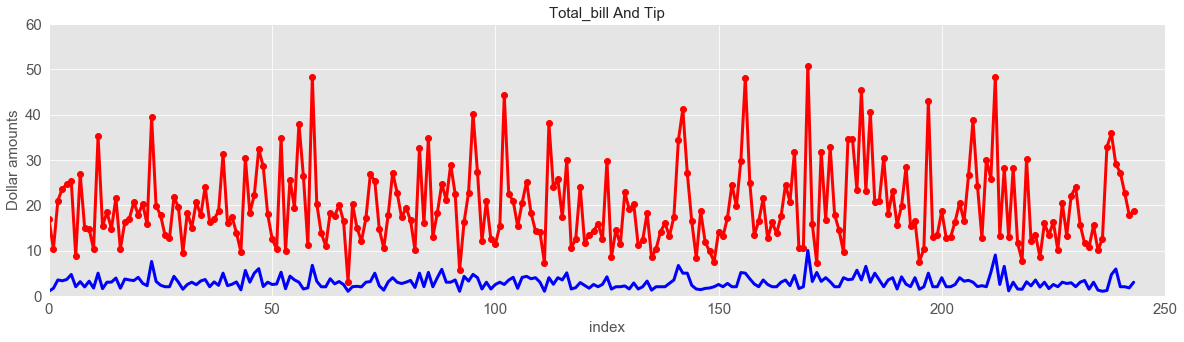

In [96]:
fig=plt.figure(figsize=(20,5))
plt.axis([0,250,0,60])
plt.plot(df.total_bill,'r-',lw=3,marker='o')
plt.plot(df.tip,'b-',lw=3)
plt.title('Total_bill And Tip',fontsize=15)
plt.ylabel('Dollar amounts',fontsize=15)
plt.xlabel('index',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.xaxis(fontsize=20)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text yticklabel objects>)

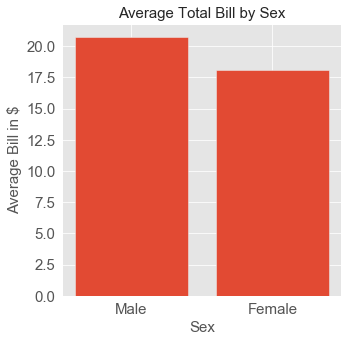

In [97]:
fig=plt.figure(figsize=(5,5))
#plt.axis([0,250,0,60])
plt.bar(t3['sex'],t3['mean'])
plt.title('Average Total Bill by Sex',fontsize=15)
plt.ylabel('Average Bill in $',fontsize=15)
plt.xlabel('Sex',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Text(0.5, 0, 'Perc Tip')

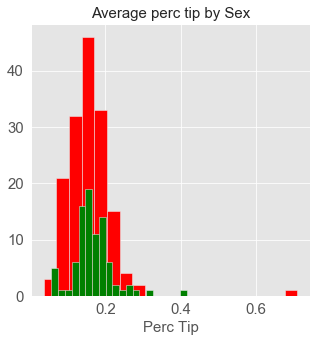

In [98]:
fig=plt.figure(figsize=(5,5))
#plt.axis([0,250,0,60])
plt.hist(df[(df.sex=='Male')]['perc'],color='r',bins=20)
plt.hist(df[(df.sex=='Female')]['perc'],color='g',bins=20)
plt.title('Average perc tip by Sex',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Perc Tip',fontsize=15)

Text(0, 0.5, 'Tip')

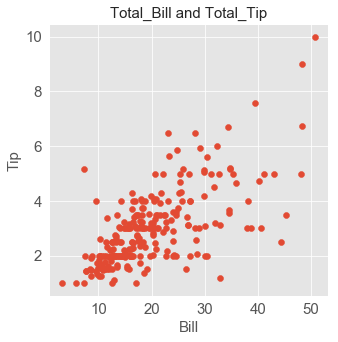

In [99]:
fig=plt.figure(figsize=(5,5))
#plt.axis([0,250,0,60])
plt.scatter(df.total_bill,df.tip)
plt.title('Total_Bill and Total_Tip',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Bill',fontsize=15)
plt.ylabel('Tip',fontsize=15)

Text(0.5, 1.0, 'Perc Tip')

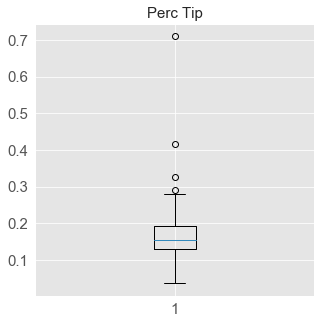

In [100]:
fig=plt.figure(figsize=(5,5))
#plt.axis([0,250,0,60])
plt.boxplot(df['perc'])
plt.title('Perc Tip',fontsize=15)

Text(0.5, 0, 'Total_Bill')

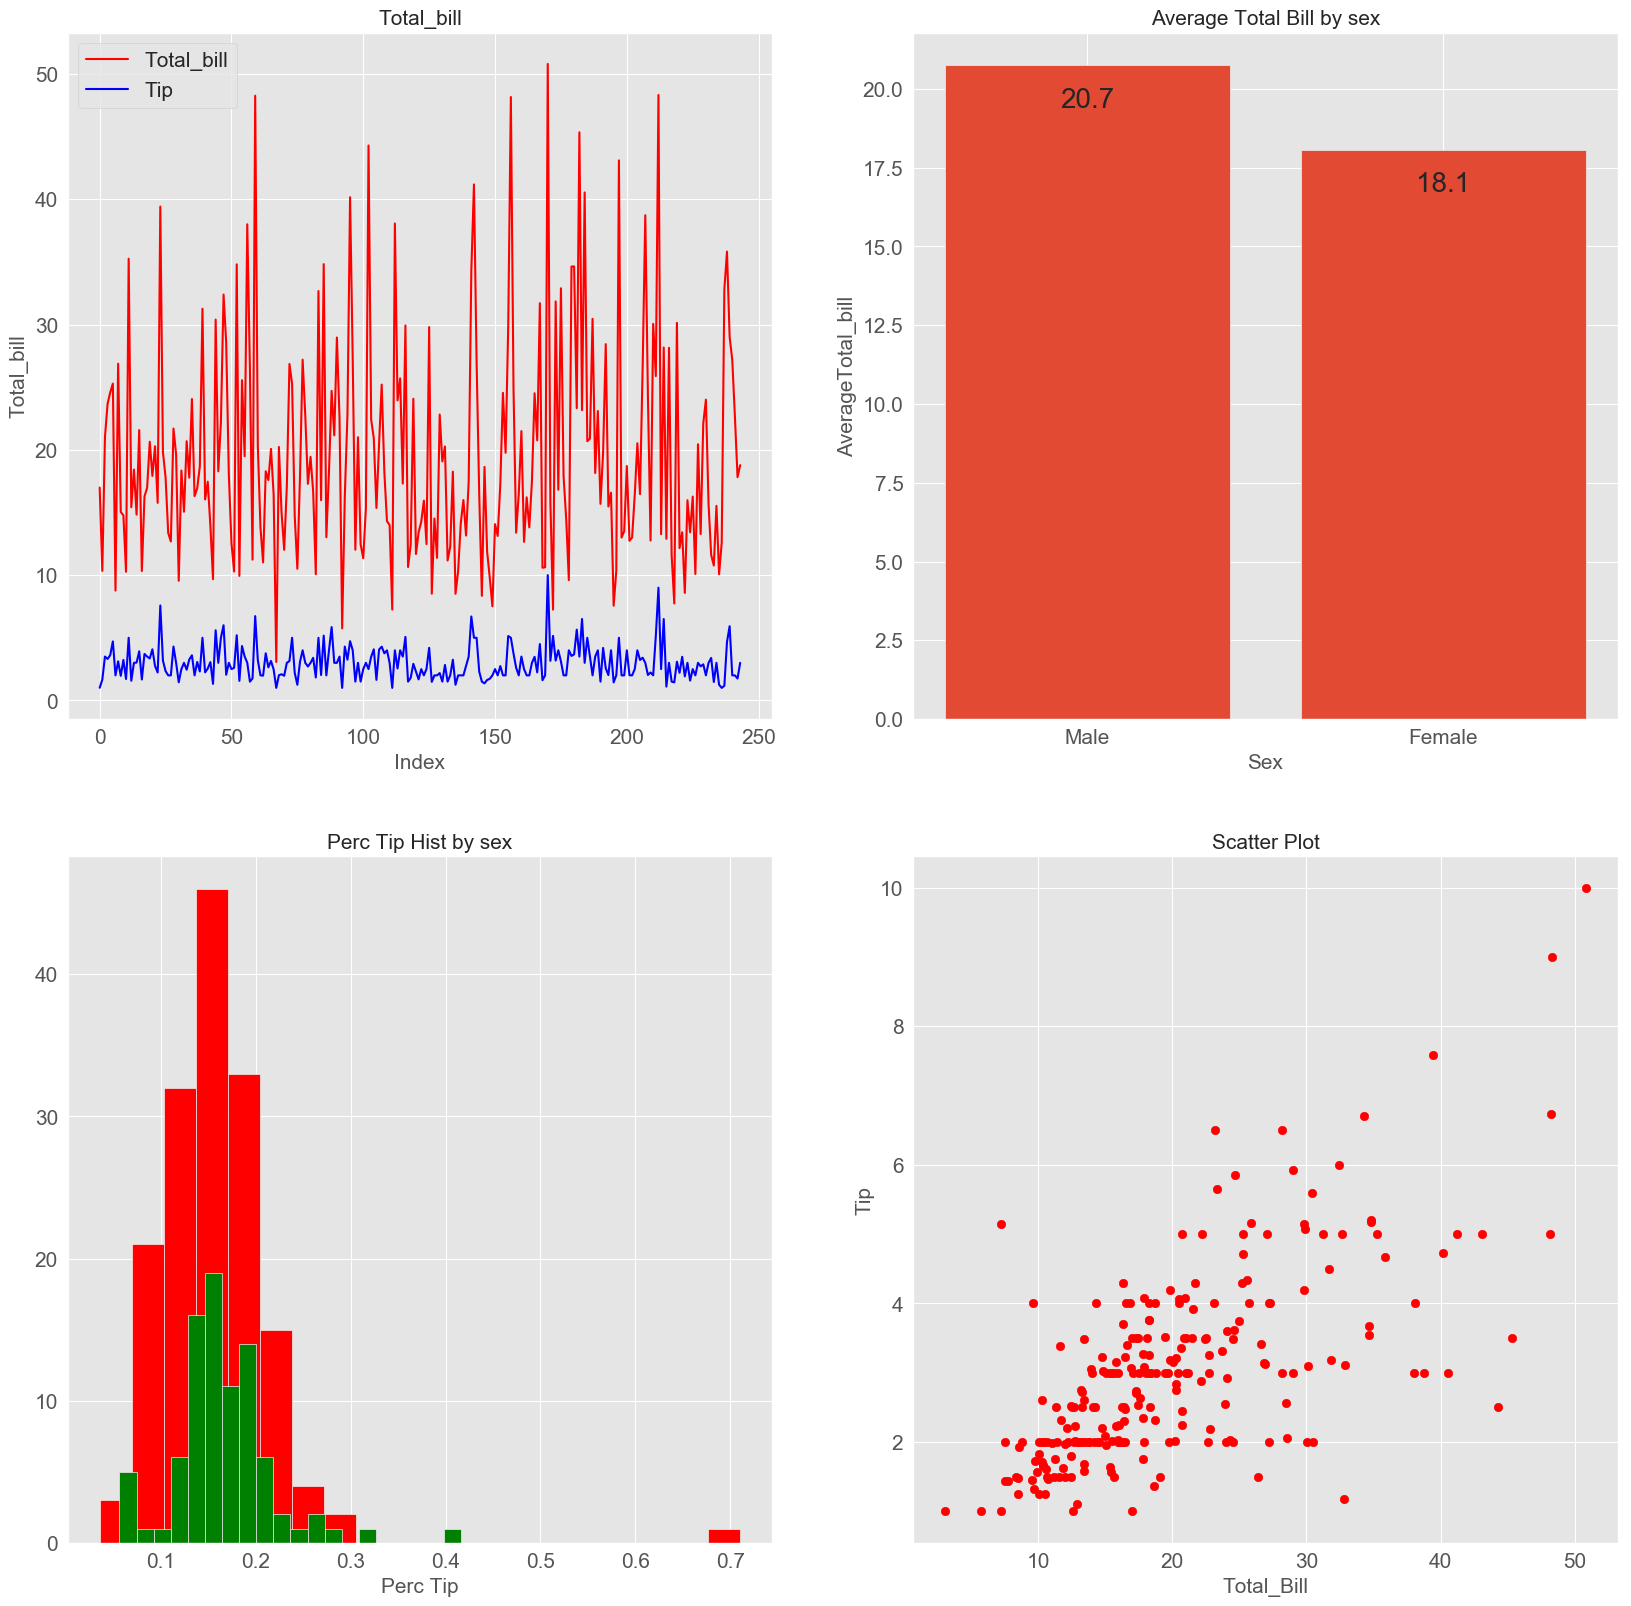

In [101]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

fig, axes =plt.subplots(figsize=(20,20),nrows=2,ncols=2,dpi=100)
axes[0,0].plot(df.total_bill,'r-',label='Total_bill')
axes[0,0].plot(df.tip,'b-',label='Tip')
axes[0,0].set_title('Total_bill',fontsize=15)
axes[0,0].set_ylabel('Total_bill',fontsize=15)
axes[0,0].set_xlabel('Index',fontsize=15)
axes[0,0].legend(loc='upper left',fontsize=15)


axes[0,1].bar(t3['sex'],t3['mean'])
axes[0,1].set_title('Average Total Bill by sex',fontsize=15)
axes[0,1].set_ylabel('AverageTotal_bill',fontsize=15)
axes[0,1].set_xlabel('Sex',fontsize=15)
for x,y in zip(t3['sex'],t3['mean']):
    label="{:.1f}".format(y)
    axes[0,1].annotate(label,(x,y),textcoords='offset points',xytext=(0,-30),ha='center',fontsize=20)
    
axes[1,0].hist(df[(df.sex=='Male')]['perc'],color='r',bins=20)
axes[1,0].hist(df[(df.sex=='Female')]['perc'],color='g',bins=20)
axes[1,0].set_title('Perc Tip Hist by sex',fontsize=15)
axes[1,0].set_xlabel('Perc Tip',fontsize=15)

axes[1,1].scatter(df.total_bill,df.tip,color='r')
axes[1,1].set_title('Scatter Plot',fontsize=15)
axes[1,1].set_ylabel('Tip',fontsize=15)
axes[1,1].set_xlabel('Total_Bill',fontsize=15)

Text(0.5, 0, 'Tip Percentage')

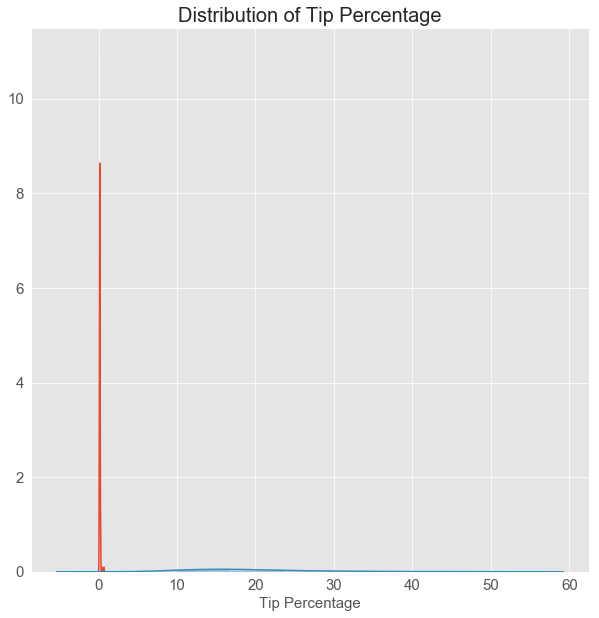

In [102]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df['perc'])
sns.distplot(df['total_bill'])
plt.title('Distribution of Tip Percentage', fontsize=20)
plt.xlabel('Tip Percentage', fontsize=15)

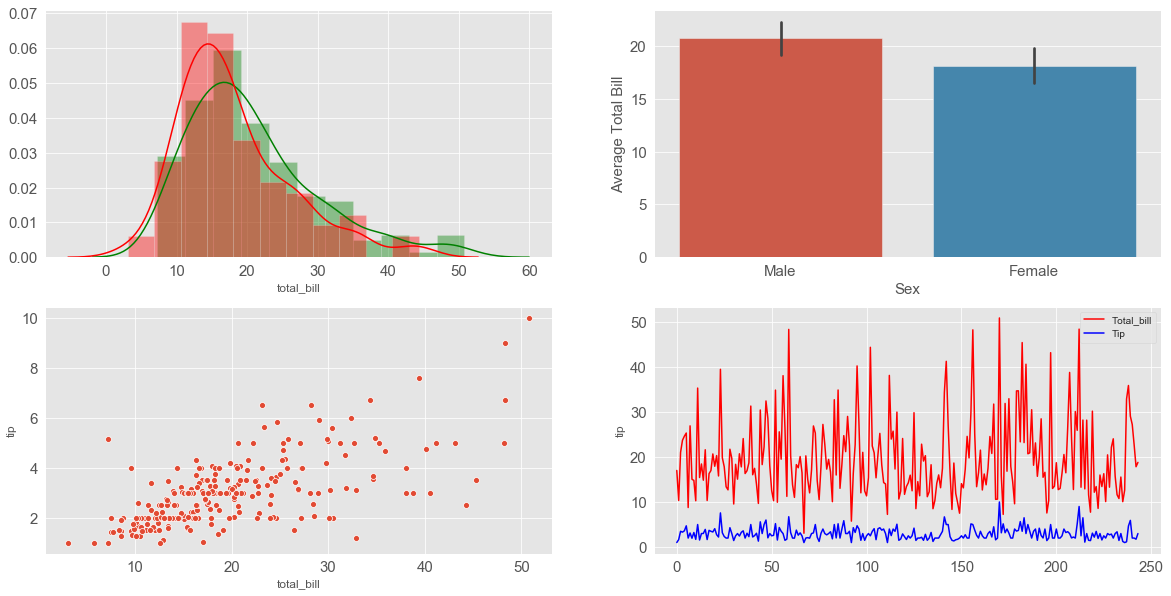

In [103]:
fig, axes =plt.subplots(figsize=(20,10),nrows=2,ncols=2)
sns.distplot(df[(df.sex=='Male')]['total_bill'],ax=axes[0,0],color='g')
sns.distplot(df[(df.sex=='Female')]['total_bill'],ax=axes[0,0],color='r')

sns.barplot(df['sex'],df['total_bill'],ax=axes[0,1])
axes[0,1].set_ylabel('Average Total Bill', fontsize=15)
axes[0,1].set_xlabel('Sex', fontsize=15)

sns.scatterplot(df['total_bill'],df['tip'],ax=axes[1,0])

sns.lineplot(df.index,df.total_bill,color='r',label='Total_bill',ax=axes[1,1])
sns.lineplot(df.index,df.tip,color='b',label='Tip',ax=axes[1,1])


In [104]:
from statsmodels.stats import api

dir(api)


['CompareCox',
 'CompareJ',
 'CompareMeans',
 'DescrStatsW',
 'Describe',
 'FTestAnovaPower',
 'FTestPower',
 'FactoredPSDMatrix',
 'GofChisquarePower',
 'HetGoldfeldQuandt',
 'Mediation',
 'NormalIndPower',
 'NullDistribution',
 'OaxacaBlinder',
 'RegressionFDR',
 'Runs',
 'SquareTable',
 'StratifiedTable',
 'TTestIndPower',
 'TTestPower',
 'Table',
 'Table2x2',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acorr_breusch_godfrey',
 'acorr_ljungbox',
 'acorr_lm',
 'anova_lm',
 'binom_test',
 'binom_test_reject_interval',
 'binom_tost',
 'binom_tost_reject_interval',
 'breaks_cusumolsresid',
 'breaks_hansen',
 'chisquare_effectsize',
 'cochrans_q',
 'compare_cox',
 'compare_encompassing',
 'compare_j',
 'corr_clipped',
 'corr_nearest',
 'corr_nearest_factor',
 'corr_thresholded',
 'cov_cluster',
 'cov_cluster_2groups',
 'cov_hac',
 'cov_hc0',
 'cov_hc1',
 'cov_hc2',
 'cov_hc3',
 'cov_nearest',
 'cov_neares

In [105]:
print('abc ' + "{:.4f}".format(0.333345676))

abc 0.3333


In [106]:
from scipy.stats import bernoulli
from scipy.stats import binom

In [107]:
import statsmodels.stats.api as sm
from scipy.stats import *

#print(dir(sm))
#hypothesis testing

#one sample test

#H0: avg total_bill=25
#HA: avg total_bill != 25

alpha=0.05
hv=25

u=df['total_bill'].mean()
sd=df['total_bill'].std()
n=df['total_bill'].count()
se_m=sd/np.sqrt(n)
tstat=(hv-u)/se_m
pvalue= (1-t.cdf(abs(tstat),df=n-1))*2
cv = se_m* t.ppf(alpha,df=n-1)
ub=u+cv
lb=u-cv

print('Mean Sample: ' +str(u))
print('std Sample: ' +str(sd))
print('sample size: '+str(n))
print('pvalue: '+str(pvalue))
print('se Sample: ' +str(se_m))
print('t: ' +str(tstat))
print('confint: '+str((ub,lb)))


#one sample test

tstat, pval = ttest_1samp(df['total_bill'], 25)
print((tstat,pval))

Mean Sample: 19.785942622950824
std Sample: 8.902411954856856
sample size: 244
pvalue: 0.0
se Sample: 0.5699185252885925
t: 9.148776791224513
confint: (18.844922560779466, 20.72696268512218)
(-9.148776791224519, 2.4066996433757685e-17)


In [122]:
#two sample test
#HO: Average total_bill for men = to that for women 
#HA: Avg Total_Bill M != Abg Total_Bill F

alpha=0.05
um= df[(df['sex']=='Male')]['total_bill'].mean()
usm= df[(df['sex']=='Male')]['total_bill'].std()
n1= df[(df['sex']=='Male')]['total_bill'].count()

uf= df[(df['sex']=='Female')]['total_bill'].mean()
usf= df[(df['sex']=='Female')]['total_bill'].std()
n2= df[(df['sex']=='Female')]['total_bill'].count()

dof=n1+n2-2

s_pool=np.sqrt((((n1-1)*usm**2) + ((n2-1)*usf**2))/(dof))
se=s_pool*np.sqrt((1/n1)+(1/n2))

tstat= (usm-usf)/se

pvalue= (1-t.cdf(abs(tstat),dof))*2
cv = se* t.ppf(alpha,dof)

ub=(usm-usf)+cv
lb=(usm-usf)-cv

print('tstat, pvalue, ub, lb :' +str([tstat, pvalue,ub,lb]))


def welch_ttest(x1, x2,alternative):
    
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    tstat = delta /  pooled_se
    df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
    
    # two side t-test
    p = 2 * t.cdf(-abs(tstat), df)
    
    # upper and lower bounds
    lb = delta - t.ppf(0.975,df)*pooled_se 
    ub = delta + t.ppf(0.975,df)*pooled_se
  
    return pd.DataFrame(np.array([tstat,df,p,delta,lb,ub]).reshape(1,-1),
                         columns=['T statistic','df','pvalue 2 sided','Difference in mean','lb','ub'])


print(welch_ttest(df[df['sex']=='Male']['total_bill'],df[df['sex']=='Female']['total_bill'],"equal"))

tstat, pvalue =ttest_ind(df[df['sex']=='Male']['total_bill'],df[df['sex']=='Female']['total_bill'], equal_var=False)

print(tstat,pvalue)


tstat, pvalue, ub, lb :[1.0487660099793592, 0.2953320833584572, -0.7106788369514008, 3.185198382136998]
   T statistic          df  pvalue 2 sided  Difference in mean        lb  \
0     2.373398  199.848262        0.018573             2.68718  0.454573   

         ub  
0  4.919787  
2.3733978410287073 0.0185733948549217


In [118]:
r=binom.rvs(n=100,p=0.3,size=1000,random_state=22)
binom.cdf(k=20,n=100,p=0.3)

0.016462853241869434

In [ ]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')